In [3]:
%pip install numpy matplotlib tensorflow scikit-learn tqdm seaborn keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [18]:
import os
from tqdm import tqdm
import glob as gb
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import kerastuner as kt

from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from tensorflow.keras.applications import (
    EfficientNetB0,
    VGG16,
    DenseNet121,
    MobileNetV2,
    InceptionV3,
    Xception
)
from tensorflow.keras.applications.efficientnet import preprocess_input as effnet_pre
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_pre
from tensorflow.keras.applications.densenet import preprocess_input as densenet_pre
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_pre
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_pre
from tensorflow.keras.applications.xception import preprocess_input as xception_pre

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix

In [7]:
# 1. CONFIGURATION

DATA_DIR         = "/Dataset"   
IMG_SIZE         = (224, 224)
BATCH_SIZE       = 32
NUM_CLASSES      = 4    
INITIAL_EPOCHS   = 10                        # initial training epochs
FINE_TUNE_EPOCHS = 5                         # epochs for fine-tuning 

In [8]:
train_dir = os.path.join(DATA_DIR, 'train')
test_dir = os.path.join(DATA_DIR, 'test')
valid_dir = os.path.join(DATA_DIR, 'valid')

100%|██████████| 5/5 [00:00<00:00, 775.32it/s]


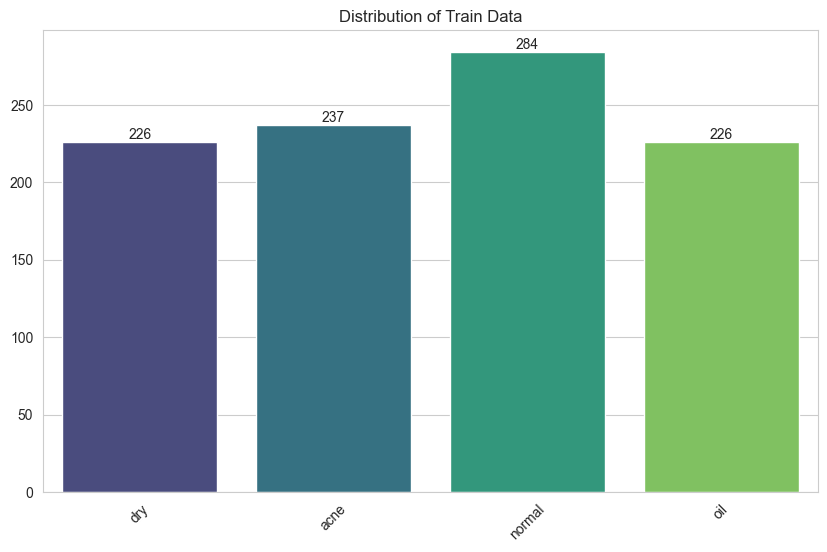

Total training examples: 973


100%|██████████| 226/226 [00:00<00:00, 104487.73it/s]


Error loading /Users/phoebe/Desktop/CMU/AI/project/Dataset/train/dry/dry68_jpg.rf.9b46b575402da7c367536c62d685eb0e.jpg: name 'load_img' is not defined
Error loading /Users/phoebe/Desktop/CMU/AI/project/Dataset/train/dry/dry11_jpg.rf.54ee1fc7f193638cdacc4cccfb747042.jpg: name 'load_img' is not defined
Error loading /Users/phoebe/Desktop/CMU/AI/project/Dataset/train/dry/dry69_jpg.rf.448fd88e6edc014c7e84ac3072b5b803.jpg: name 'load_img' is not defined
Error loading /Users/phoebe/Desktop/CMU/AI/project/Dataset/train/dry/dry62_jpg.rf.5e009b495868a5572336b9afe099830f.jpg: name 'load_img' is not defined
Error loading /Users/phoebe/Desktop/CMU/AI/project/Dataset/train/dry/dry82_jpg.rf.41bc301b2bccbd6846c99a9c75a31816.jpg: name 'load_img' is not defined
Error loading /Users/phoebe/Desktop/CMU/AI/project/Dataset/train/dry/dry60_jpg.rf.bd92ced1772adefea419bb171705f9a2.jpg: name 'load_img' is not defined
Error loading /Users/phoebe/Desktop/CMU/AI/project/Dataset/train/dry/dry35_jpg.rf.528f8938acdf

100%|██████████| 237/237 [00:00<00:00, 111054.64it/s]


Error loading /Users/phoebe/Desktop/CMU/AI/project/Dataset/train/acne/48_jpg.rf.1443e1f568305572499950a3a1cf54ad.jpg: name 'load_img' is not defined
Error loading /Users/phoebe/Desktop/CMU/AI/project/Dataset/train/acne/53_jpg.rf.ad30108383ef4d0427ad45ca4c0c5cf1.jpg: name 'load_img' is not defined
Error loading /Users/phoebe/Desktop/CMU/AI/project/Dataset/train/acne/55_jpg.rf.9f2901bd174bf4337454cb1e0acff318.jpg: name 'load_img' is not defined
Error loading /Users/phoebe/Desktop/CMU/AI/project/Dataset/train/acne/44_jpg.rf.6bc943918704a74a7c6792593ee9bd7b.jpg: name 'load_img' is not defined
Error loading /Users/phoebe/Desktop/CMU/AI/project/Dataset/train/acne/14_jpg.rf.4911930e9226c73f690d4eff1b100344.jpg: name 'load_img' is not defined
Error loading /Users/phoebe/Desktop/CMU/AI/project/Dataset/train/acne/54_jpg.rf.af6a84138243dc2b7b7db12269f653a7.jpg: name 'load_img' is not defined
Error loading /Users/phoebe/Desktop/CMU/AI/project/Dataset/train/acne/94_jpg.rf.25322c2d12c2270c1bb22c6889

100%|██████████| 285/285 [00:00<00:00, 89850.92it/s]


Error loading /Users/phoebe/Desktop/CMU/AI/project/Dataset/train/normal/1000_F_439911976_3ESvVYa7aWJjCZRg2Ulu2KGXkYVpEtT7_jpg.rf.925d5747b16fdf9d5a0e64f6d17d259b.jpg: name 'load_img' is not defined
Error loading /Users/phoebe/Desktop/CMU/AI/project/Dataset/train/normal/tai-xuong_jpg.rf.bc8b5e82ebfba34a7b705f520a83b9f0.jpg: name 'load_img' is not defined
Error loading /Users/phoebe/Desktop/CMU/AI/project/Dataset/train/normal/images-17-_jpg.rf.e1d67d0567c33b8cca969358d6ebc6c1.jpg: name 'load_img' is not defined
Error loading /Users/phoebe/Desktop/CMU/AI/project/Dataset/train/normal/esy-032152154_jpg.rf.a11e0abaab12cff8d180c337b12391df.jpg: name 'load_img' is not defined
Error loading /Users/phoebe/Desktop/CMU/AI/project/Dataset/train/normal/istockphoto-1010039320-612x612_jpg.rf.1ec7bee8f688728dff28e8b6469bf293.jpg: name 'load_img' is not defined
Error loading /Users/phoebe/Desktop/CMU/AI/project/Dataset/train/normal/images-8-_jpg.rf.9d4157fcb487293d611f1f3a67607c2a.jpg: name 'load_img' i

100%|██████████| 226/226 [00:00<00:00, 65886.75it/s]

Error loading /Users/phoebe/Desktop/CMU/AI/project/Dataset/train/oil/images66_jpeg.rf.50cf6ecf3174b596f6c5b8add615b765.jpg: name 'load_img' is not defined
Error loading /Users/phoebe/Desktop/CMU/AI/project/Dataset/train/oil/images100_jpeg.rf.08d2dda879cbeea2d4292859a85444fb.jpg: name 'load_img' is not defined
Error loading /Users/phoebe/Desktop/CMU/AI/project/Dataset/train/oil/images14_jpeg.rf.c7980a22f57bfaeca1c44e3d29672c84.jpg: name 'load_img' is not defined
Error loading /Users/phoebe/Desktop/CMU/AI/project/Dataset/train/oil/images45_jpeg.rf.075f9c8fcc6ad23c2a1e8b9f1aa2f8b7.jpg: name 'load_img' is not defined
Error loading /Users/phoebe/Desktop/CMU/AI/project/Dataset/train/oil/Face-Oil91_jpeg.rf.b7e5ec1984e694002c7e2ea274439694.jpg: name 'load_img' is not defined
Error loading /Users/phoebe/Desktop/CMU/AI/project/Dataset/train/oil/images49_jpeg.rf.0e3cbb1f6e55bd491d0e0b5d0a51e7cc.jpg: name 'load_img' is not defined
Error loading /Users/phoebe/Desktop/CMU/AI/project/Dataset/train/oi

In [9]:
# Initialize lists
categories = []
class_count = []
train_exm = 0

# Iterate through the training directory
for f in tqdm(os.listdir(train_dir)):
    path = os.path.join(train_dir, f)

    if not os.path.isdir(path) or f.startswith('.'):  # Skip non-directory files and hidden files
        continue

    files = gb.glob(os.path.join(path, '*'))
    categories.append(f)
    class_count.append(len(files))
    train_exm += len(files)

# Data Visualization
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=categories, y=class_count, hue=categories, palette="viridis", dodge=False)

# Add labels to bars
for container in ax.containers:
    ax.bar_label(container)

plt.title('Distribution of Train Data')
plt.xticks(rotation=45)

# Remove legend if it exists
if ax.legend_:
    ax.legend_.remove()

plt.show()
print(f"Total training examples: {train_exm}")

# Data Loading and Preprocessing
data = []
labels = []

for c in categories:
    path = os.path.join(train_dir, c)

    for img in tqdm(os.listdir(path)):
        img_path = os.path.join(path, img)

        try:
            image = load_img(img_path, target_size=(224, 224))  # Load image
            image = img_to_array(image)  # Convert to array
            image = preprocess_input(image)  # Normalize

            data.append(image)
            labels.append(c)

        except Exception as e:
            print(f"Error loading {img_path}: {e}")

# Convert lists to numpy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

# Print dataset summary
print(f"Loaded {len(data)} images from {len(set(labels))} categories.")


In [10]:
# 2. DATA PIPELINE FUNCTION

def create_data_generators(data_dir, img_size=IMG_SIZE, batch_size=BATCH_SIZE, 
                           preprocessing_func=None):
    train_datagen = ImageDataGenerator(
        preprocessing_function=preprocessing_func,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    val_datagen = ImageDataGenerator(
        preprocessing_function=preprocessing_func
    )

    train_gen = train_datagen.flow_from_directory(
        os.path.join(data_dir, 'train'),
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True
    )
    
    val_gen = val_datagen.flow_from_directory(
        os.path.join(data_dir, 'valid'),
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    
    )
    return train_gen, val_gen

In [11]:
# 3. MODEL BUILDER FUNCTION

def build_model(model_name, num_classes=NUM_CLASSES, img_size=IMG_SIZE):
    """
    Returns a compiled model for a given architecture (`model_name`).
    Freezes the base and adds a custom classification head.
    
    """
    if model_name == "MobileNetV2":
        base_model = MobileNetV2(
            include_top=False,
            input_shape=(img_size[0], img_size[1], 3),
            weights='imagenet'
        )
    elif model_name == "InceptionV3":
        base_model = InceptionV3(
            include_top=False,
            input_shape=(img_size[0], img_size[1], 3),
            weights='imagenet'
        )

    elif model_name == "EfficientNet":
        base_model = EfficientNetB0(
            include_top=False,
            input_shape=(img_size[0], img_size[1], 3),
            weights='imagenet'
        )
    
    elif model_name == "VGG16":
        base_model = VGG16(
            include_top=False,
            input_shape=(img_size[0], img_size[1], 3),
            weights='imagenet'
        )
    elif model_name == "DenseNet":
        base_model = DenseNet121(
            include_top=False,
            input_shape=(img_size[0], img_size[1], 3),
            weights='imagenet'
        )
    else:
        raise ValueError(f"Unknown model name: {model_name}")

    # Freeze base model
    base_model.trainable = False

    # Create a custom head
    inputs = tf.keras.Input(shape=(img_size[0], img_size[1], 3))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs, outputs)

    # Compile
    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-3),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

def get_preprocessing_func(model_name):
    """
    Returns the appropriate preprocessing function for each model.
    """
    if model_name == "MobileNetV2":
        return mobilenet_pre
    elif model_name == "InceptionV3":
        return inception_pre
    elif model_name == "EfficientNet":
        return effnet_pre
    elif model_name == "VGG16":
        return vgg_pre
    elif model_name == "DenseNet":
        return densenet_pre
    else:
        # if unknown or none, fallback to a no-op
        return lambda x: x

In [12]:
# 4. TRAINING AND FINE-TUNING FUNCTION

def train_model(model, train_gen, val_gen, epochs=INITIAL_EPOCHS, model_name=""):
    """
    Trains a given model using standard callbacks (EarlyStopping, ModelCheckpoint, etc.).
    """
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ModelCheckpoint(os.path.join(DATA_DIR, f"best_{model_name}.h5"), monitor='val_accuracy', 
                        save_best_only=True, mode='max'),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)
    ]
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=epochs,
        callbacks=callbacks
    )
    return history

def fine_tune_model(model, train_gen, val_gen, fine_tune_layers=30, 
                    epochs=FINE_TUNE_EPOCHS, model_name=""):
    """
    Unfreezes the last `fine_tune_layers` of the base model, then re-compiles
    and trains the model at a lower learning rate.
    """
    base_model = model.get_layer(index=1)  # The second layer is the base model (e.g., ResNet50, etc.)
    total_layers = len(base_model.layers)
    print(f"Total layers in base model: {total_layers}. Unfreezing last {fine_tune_layers} layers.")

    # Unfreeze
    for layer in base_model.layers[-fine_tune_layers:]:
        layer.trainable = True

    # Re-compile
    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-4),  # lower LR
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    callbacks = [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ModelCheckpoint(os.path.join(DATA_DIR, f"best_finetuned_{model_name}.h5"), monitor='val_accuracy', 
                        save_best_only=True, mode='max'),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1)
    ]

    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=epochs,
        callbacks=callbacks
    )
    return history

In [13]:
# 5. HELPER: PLOT TRAINING CURVES

def plot_training_curves(history, model_name=""):
    """
    Plots accuracy and loss from the Keras history object.
    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(1, len(acc) + 1)

    # Plot Accuracy
    plt.figure()
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Val Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.legend()
    plt.show()

    # Plot Loss
    plt.figure()
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Val Loss')
    plt.title(f'{model_name} - Loss')
    plt.legend()
    plt.show()

In [14]:
# 6. HYPERPARAMETER TUNER MODEL BUILDER
def tuner_model_builder(hp, model_name):
    lr        = hp.Float("learning_rate", 1e-4, 1e-2, sampling="log")
    drop_rate = hp.Float("dropout_rate", 0.0, 0.5, step=0.1)

    if model_name == "MobileNetV2":
        base = MobileNetV2(include_top=False, input_shape=(*IMG_SIZE,3), weights="imagenet")
    elif model_name == "InceptionV3":
        base = InceptionV3(include_top=False, input_shape=(*IMG_SIZE,3), weights="imagenet")
    elif model_name == "EfficientNet":
        base = EfficientNetB0(include_top=False, input_shape=(*IMG_SIZE,3), weights="imagenet")
    elif model_name == "VGG16":
        base = VGG16(include_top=False, input_shape=(*IMG_SIZE,3), weights="imagenet")
    elif model_name == "DenseNet":
        base = DenseNet121(include_top=False, input_shape=(*IMG_SIZE,3), weights="imagenet")
    else:
        raise ValueError(model_name)

    base.trainable = False
    inputs = tf.keras.Input(shape=(*IMG_SIZE,3))
    x = base(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(drop_rate)(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

    model = models.Model(inputs, outputs)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(lr),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model


=== Hyperparameter tuning for MobileNetV2 ===
Found 973 images belonging to 4 classes.
Found 86 images belonging to 4 classes.
Reloading Tuner from kt_tuner/MobileNetV2/tuner0.json
Trial 0:
  Hyperparameters: {'learning_rate': 0.008174895487086303, 'dropout_rate': 0.1}
  Best val_accuracy: 0.8605

Trial 3:
  Hyperparameters: {'learning_rate': 0.002152283194433361, 'dropout_rate': 0.2}
  Best val_accuracy: 0.8023

Trial 1:
  Hyperparameters: {'learning_rate': 0.0009116023591102821, 'dropout_rate': 0.1}
  Best val_accuracy: 0.8140

Trial 2:
  Hyperparameters: {'learning_rate': 0.0005308035235464309, 'dropout_rate': 0.0}
  Best val_accuracy: 0.7907

Trial 6:
  Hyperparameters: {'learning_rate': 0.00010374652025290634, 'dropout_rate': 0.30000000000000004}
  Best val_accuracy: 0.6977

Trial 4:
  Hyperparameters: {'learning_rate': 0.0018614191986076204, 'dropout_rate': 0.4}
  Best val_accuracy: 0.8140

Trial 5:
  Hyperparameters: {'learning_rate': 0.00013499193296499687, 'dropout_rate': 0.2

/Users/phoebe/miniforge3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.5947 - loss: 1.3983

31/31 ━━━━━━━━━━━━━━━━━━━━ 15s 334ms/step - accuracy: 0.5990 - loss: 1.3806 - val_accuracy: 0.7558 - val_loss: 0.5853 - learning_rate: 0.0082
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.8837 - loss: 0.3284

31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 305ms/step - accuracy: 0.8839 - loss: 0.3275 - val_accuracy: 0.7907 - val_loss: 0.4840 - learning_rate: 0.0082
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.9250 - loss: 0.2061

31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 296ms/step - accuracy: 0.9250 - loss: 0.2061 - val_accuracy: 0.8372 - val_loss: 0.4427 - learning_rate: 0.0082
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 300ms/step - accuracy: 0.9378 - loss: 0.1776 - val_accuracy: 0.8140 - val_loss: 0.3981 - learning_rate: 0.0082
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 299ms/step - accuracy: 0.9252 - loss: 0.2144 - val_accuracy: 0.7558 - val_loss: 0.7010 - learning_rate: 0.0082
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.9334 - loss: 0.1843

31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 308ms/step - accuracy: 0.9333 - loss: 0.1839 - val_accuracy: 0.8721 - val_loss: 0.3362 - learning_rate: 0.0082
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.9511 - loss: 0.1179

31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 301ms/step - accuracy: 0.9507 - loss: 0.1188 - val_accuracy: 0.8837 - val_loss: 0.3359 - learning_rate: 0.0082
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 298ms/step - accuracy: 0.9462 - loss: 0.1250 - val_accuracy: 0.8372 - val_loss: 0.4072 - learning_rate: 0.0082
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 301ms/step - accuracy: 0.9212 - loss: 0.1813 - val_accuracy: 0.7791 - val_loss: 0.8415 - learning_rate: 0.0082
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 296ms/step - accuracy: 0.9349 - loss: 0.1582 - val_accuracy: 0.8837 - val_loss: 0.2667 - learning_rate: 0.0082


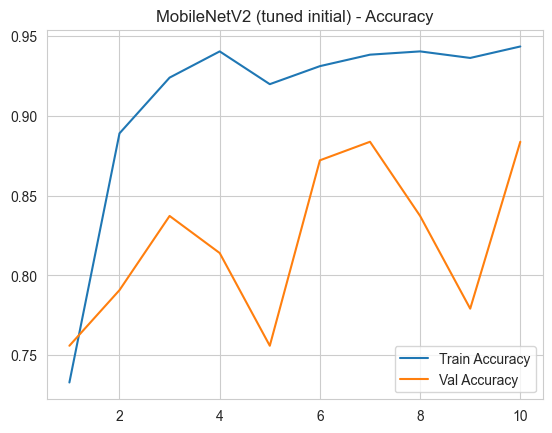

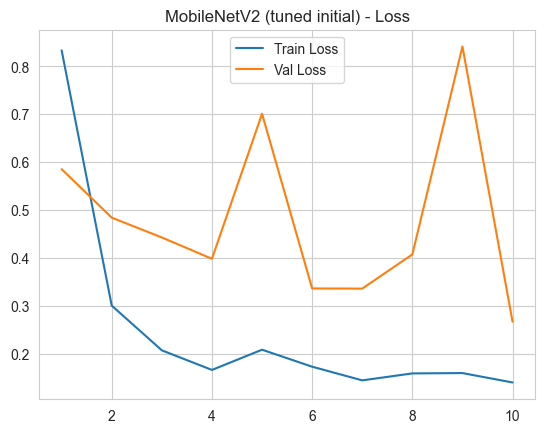

Total layers in base model: 154. Unfreezing last 30 layers.
Epoch 1/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.8594 - loss: 0.4872

31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 383ms/step - accuracy: 0.8604 - loss: 0.4833 - val_accuracy: 0.8721 - val_loss: 0.4328 - learning_rate: 1.0000e-04
Epoch 2/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 336ms/step - accuracy: 0.9350 - loss: 0.1654 - val_accuracy: 0.8721 - val_loss: 0.3399 - learning_rate: 1.0000e-04
Epoch 3/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 336ms/step - accuracy: 0.9640 - loss: 0.1142 - val_accuracy: 0.8721 - val_loss: 0.4296 - learning_rate: 1.0000e-04
Epoch 4/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.9720 - loss: 0.0695


Epoch 4: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 352ms/step - accuracy: 0.9719 - loss: 0.0696 - val_accuracy: 0.9070 - val_loss: 0.3880 - learning_rate: 1.0000e-04
Epoch 5/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 338ms/step - accuracy: 0.9751 - loss: 0.0659 - val_accuracy: 0.8953 - val_loss: 0.3656 - learning_rate: 2.0000e-05


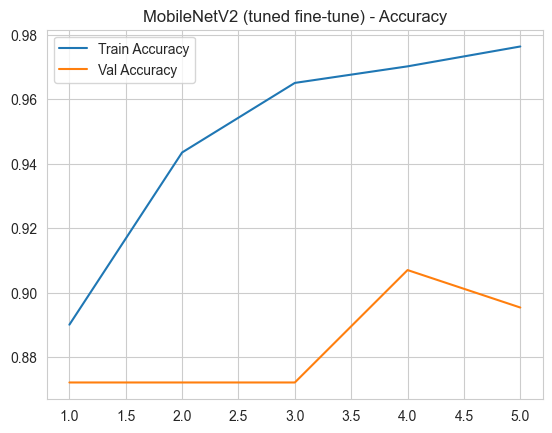

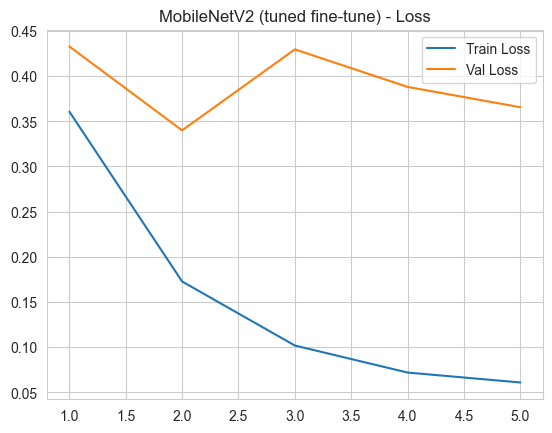

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 0.9009 - loss: 0.2613
MobileNetV2 tuned final — val_loss: 0.3399, val_acc: 0.8721
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 486ms/step
Confusion matrix:
 [[20  0  0  0]
 [ 0 17  2  0]
 [ 0  0 23  5]
 [ 1  0  3 15]]
              precision    recall  f1-score   support

        acne       0.95      1.00      0.98        20
         dry       1.00      0.89      0.94        19
      normal       0.82      0.82      0.82        28
         oil       0.75      0.79      0.77        19

    accuracy                           0.87        86
   macro avg       0.88      0.88      0.88        86
weighted avg       0.88      0.87      0.87        86

=== Done with MobileNetV2 ===


=== Hyperparameter tuning for InceptionV3 ===
Found 973 images belonging to 4 classes.
Found 86 images belonging to 4 classes.
Reloading Tuner from kt_tuner/InceptionV3/tuner0.json
Trial 0:
  Hyperparameters: {'learning_rate': 0.00306562330900601, 'dropout_rate': 0.300000000000000

/Users/phoebe/miniforge3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 644ms/step - accuracy: 0.4878 - loss: 1.2628

31/31 ━━━━━━━━━━━━━━━━━━━━ 27s 762ms/step - accuracy: 0.4922 - loss: 1.2534 - val_accuracy: 0.6047 - val_loss: 0.8464 - learning_rate: 0.0031
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 675ms/step - accuracy: 0.7648 - loss: 0.5632

31/31 ━━━━━━━━━━━━━━━━━━━━ 23s 743ms/step - accuracy: 0.7656 - loss: 0.5622 - val_accuracy: 0.7093 - val_loss: 0.6018 - learning_rate: 0.0031
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 673ms/step - accuracy: 0.8610 - loss: 0.4018

31/31 ━━━━━━━━━━━━━━━━━━━━ 23s 740ms/step - accuracy: 0.8610 - loss: 0.4014 - val_accuracy: 0.7558 - val_loss: 0.6009 - learning_rate: 0.0031
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 22s 695ms/step - accuracy: 0.8792 - loss: 0.3303 - val_accuracy: 0.7326 - val_loss: 0.6790 - learning_rate: 0.0031
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 22s 719ms/step - accuracy: 0.8706 - loss: 0.3211 - val_accuracy: 0.7442 - val_loss: 0.5616 - learning_rate: 0.0031
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 757ms/step - accuracy: 0.8938 - loss: 0.3055

31/31 ━━━━━━━━━━━━━━━━━━━━ 26s 830ms/step - accuracy: 0.8938 - loss: 0.3051 - val_accuracy: 0.7791 - val_loss: 0.5267 - learning_rate: 0.0031
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 27s 858ms/step - accuracy: 0.9155 - loss: 0.2441 - val_accuracy: 0.7791 - val_loss: 0.5719 - learning_rate: 0.0031
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 24s 763ms/step - accuracy: 0.8739 - loss: 0.2894 - val_accuracy: 0.7674 - val_loss: 0.5830 - learning_rate: 0.0031
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 668ms/step - accuracy: 0.9055 - loss: 0.2930


Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0006131246685981751.
31/31 ━━━━━━━━━━━━━━━━━━━━ 23s 736ms/step - accuracy: 0.9054 - loss: 0.2922 - val_accuracy: 0.7907 - val_loss: 0.5555 - learning_rate: 0.0031
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 23s 729ms/step - accuracy: 0.8823 - loss: 0.2785 - val_accuracy: 0.7907 - val_loss: 0.4952 - learning_rate: 6.1312e-04


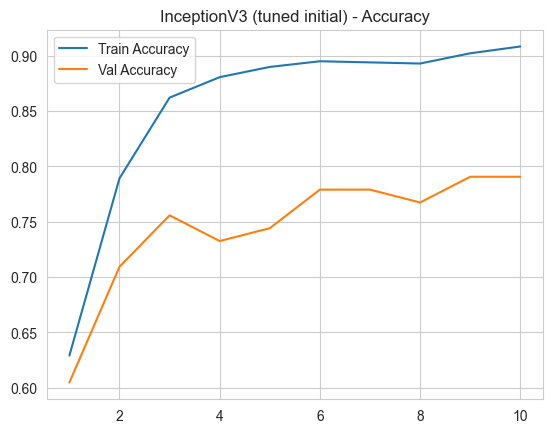

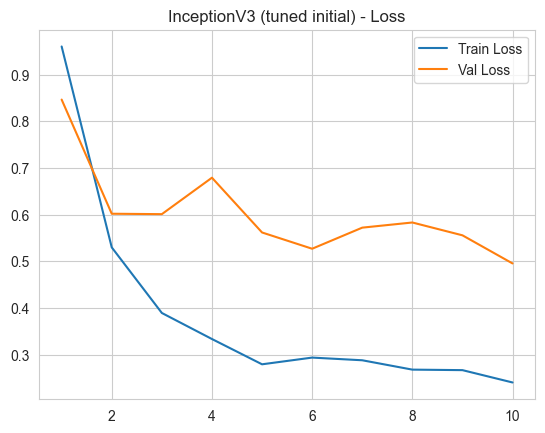

Total layers in base model: 311. Unfreezing last 30 layers.
Epoch 1/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 779ms/step - accuracy: 0.8943 - loss: 0.2860

31/31 ━━━━━━━━━━━━━━━━━━━━ 33s 902ms/step - accuracy: 0.8945 - loss: 0.2855 - val_accuracy: 0.8140 - val_loss: 0.5847 - learning_rate: 1.0000e-04
Epoch 2/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 26s 821ms/step - accuracy: 0.9348 - loss: 0.1997 - val_accuracy: 0.8023 - val_loss: 0.6119 - learning_rate: 1.0000e-04
Epoch 3/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 739ms/step - accuracy: 0.9350 - loss: 0.1625

31/31 ━━━━━━━━━━━━━━━━━━━━ 25s 807ms/step - accuracy: 0.9353 - loss: 0.1624 - val_accuracy: 0.8953 - val_loss: 0.3313 - learning_rate: 1.0000e-04
Epoch 4/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 25s 788ms/step - accuracy: 0.9568 - loss: 0.1287 - val_accuracy: 0.8605 - val_loss: 0.4518 - learning_rate: 1.0000e-04
Epoch 5/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 739ms/step - accuracy: 0.9761 - loss: 0.0781
Epoch 5: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
31/31 ━━━━━━━━━━━━━━━━━━━━ 25s 798ms/step - accuracy: 0.9758 - loss: 0.0786 - val_accuracy: 0.8372 - val_loss: 0.3986 - learning_rate: 1.0000e-04


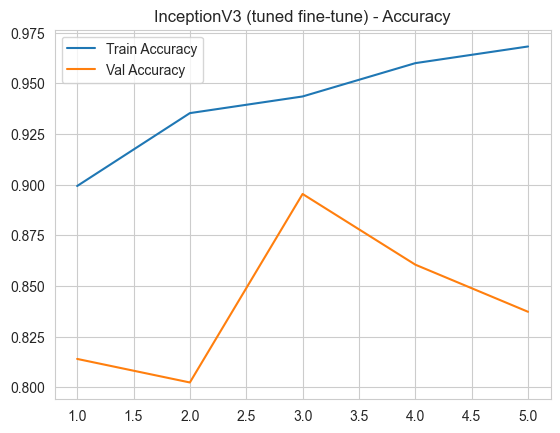

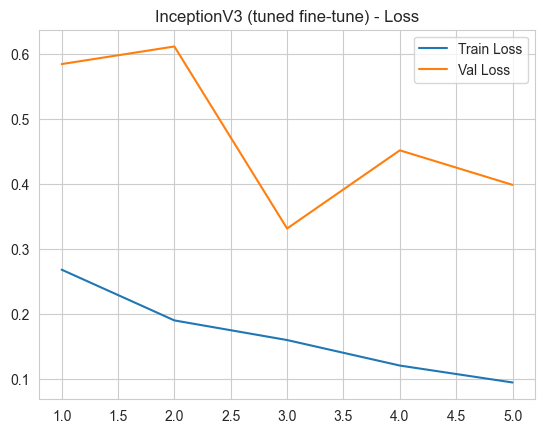

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 558ms/step - accuracy: 0.9242 - loss: 0.2313
InceptionV3 tuned final — val_loss: 0.3313, val_acc: 0.8953
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step  
Confusion matrix:
 [[20  0  0  0]
 [ 0 19  0  0]
 [ 1  0 22  5]
 [ 1  1  1 16]]
              precision    recall  f1-score   support

        acne       0.91      1.00      0.95        20
         dry       0.95      1.00      0.97        19
      normal       0.96      0.79      0.86        28
         oil       0.76      0.84      0.80        19

    accuracy                           0.90        86
   macro avg       0.89      0.91      0.90        86
weighted avg       0.90      0.90      0.89        86

=== Done with InceptionV3 ===


=== Hyperparameter tuning for EfficientNet ===
Found 973 images belonging to 4 classes.
Found 86 images belonging to 4 classes.
Reloading Tuner from kt_tuner/EfficientNet/tuner0.json
Trial 1:
  Hyperparameters: {'learning_rate': 0.008537111967155175, 'dropout_rate': 0.4}
  Best val

/Users/phoebe/miniforge3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.6903 - loss: 0.7385

31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 481ms/step - accuracy: 0.6938 - loss: 0.7315 - val_accuracy: 0.7907 - val_loss: 0.6243 - learning_rate: 0.0086
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - accuracy: 0.8996 - loss: 0.2593

31/31 ━━━━━━━━━━━━━━━━━━━━ 14s 454ms/step - accuracy: 0.8999 - loss: 0.2588 - val_accuracy: 0.8140 - val_loss: 0.4762 - learning_rate: 0.0086
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.9527 - loss: 0.1751

31/31 ━━━━━━━━━━━━━━━━━━━━ 15s 476ms/step - accuracy: 0.9528 - loss: 0.1748 - val_accuracy: 0.8605 - val_loss: 0.4345 - learning_rate: 0.0086
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.9639 - loss: 0.1169

31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 502ms/step - accuracy: 0.9638 - loss: 0.1172 - val_accuracy: 0.8721 - val_loss: 0.4814 - learning_rate: 0.0086
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 14s 446ms/step - accuracy: 0.9626 - loss: 0.1008 - val_accuracy: 0.8721 - val_loss: 0.3726 - learning_rate: 0.0086
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.9728 - loss: 0.0889

31/31 ━━━━━━━━━━━━━━━━━━━━ 15s 486ms/step - accuracy: 0.9727 - loss: 0.0891 - val_accuracy: 0.9070 - val_loss: 0.4122 - learning_rate: 0.0086
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 14s 452ms/step - accuracy: 0.9778 - loss: 0.0619 - val_accuracy: 0.9070 - val_loss: 0.3008 - learning_rate: 0.0086
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 14s 432ms/step - accuracy: 0.9754 - loss: 0.0851 - val_accuracy: 0.8488 - val_loss: 0.4077 - learning_rate: 0.0086
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 14s 431ms/step - accuracy: 0.9884 - loss: 0.0573 - val_accuracy: 0.8721 - val_loss: 0.4114 - learning_rate: 0.0086
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 13s 426ms/step - accuracy: 0.9800 - loss: 0.0785 - val_accuracy: 0.8953 - val_loss: 0.2928 - learning_rate: 0.0086


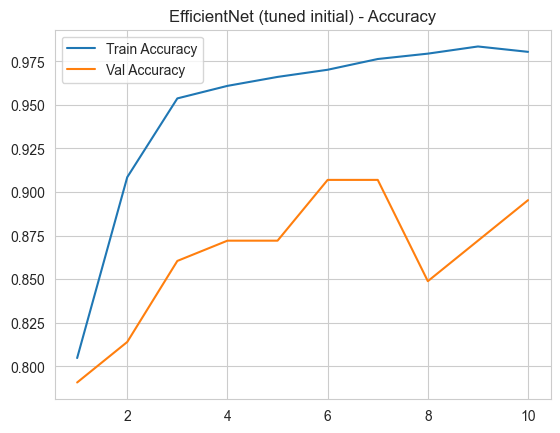

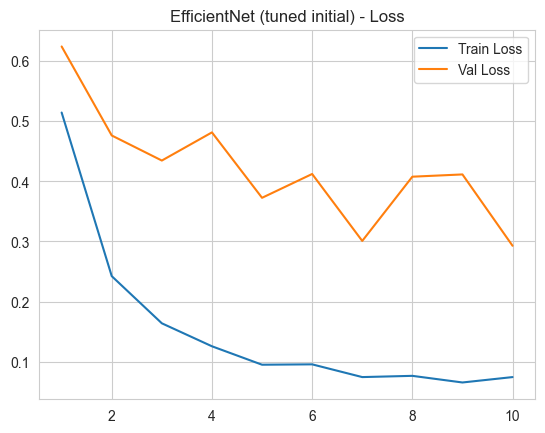

Total layers in base model: 238. Unfreezing last 30 layers.
Epoch 1/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - accuracy: 0.8638 - loss: 0.3577

31/31 ━━━━━━━━━━━━━━━━━━━━ 25s 572ms/step - accuracy: 0.8649 - loss: 0.3546 - val_accuracy: 0.8837 - val_loss: 0.3464 - learning_rate: 1.0000e-04
Epoch 2/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 507ms/step - accuracy: 0.9632 - loss: 0.1228 - val_accuracy: 0.8605 - val_loss: 0.4155 - learning_rate: 1.0000e-04
Epoch 3/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 501ms/step - accuracy: 0.9703 - loss: 0.0919 - val_accuracy: 0.8605 - val_loss: 0.3425 - learning_rate: 1.0000e-04
Epoch 4/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 492ms/step - accuracy: 0.9696 - loss: 0.0751 - val_accuracy: 0.8488 - val_loss: 0.4307 - learning_rate: 1.0000e-04
Epoch 5/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.9665 - loss: 0.0672
Epoch 5: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 497ms/step - accuracy: 0.9669 - loss: 0.0671 - val_accuracy: 0.8721 - val_loss: 0.4148 - learning_rate: 1.0000e-04


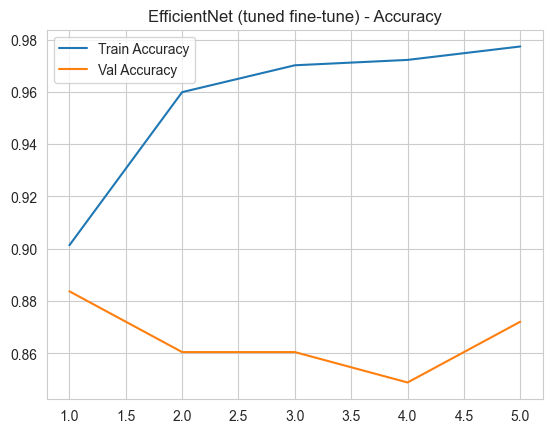

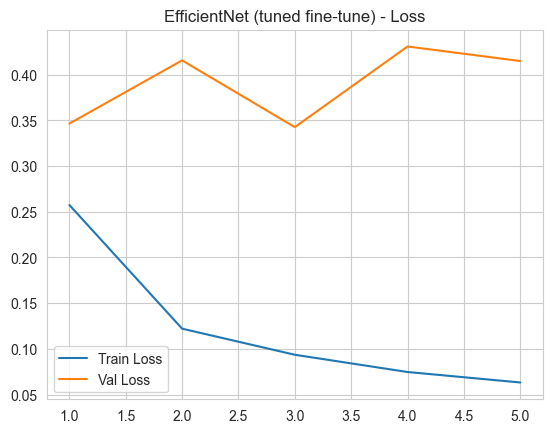

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 312ms/step - accuracy: 0.8912 - loss: 0.2735
EfficientNet tuned final — val_loss: 0.3425, val_acc: 0.8605
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 904ms/step
Confusion matrix:
 [[20  0  0  0]
 [ 0 19  0  0]
 [ 0  1 18  9]
 [ 1  0  1 17]]
              precision    recall  f1-score   support

        acne       0.95      1.00      0.98        20
         dry       0.95      1.00      0.97        19
      normal       0.95      0.64      0.77        28
         oil       0.65      0.89      0.76        19

    accuracy                           0.86        86
   macro avg       0.88      0.88      0.87        86
weighted avg       0.88      0.86      0.86        86

=== Done with EfficientNet ===


=== Hyperparameter tuning for VGG16 ===
Found 973 images belonging to 4 classes.
Found 86 images belonging to 4 classes.
Reloading Tuner from kt_tuner/VGG16/tuner0.json
Trial 0:
  Hyperparameters: {'learning_rate': 0.002378254608268293, 'dropout_rate': 0.30000000000000004}
  Bes

/Users/phoebe/miniforge3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4327 - loss: 2.7791

31/31 ━━━━━━━━━━━━━━━━━━━━ 126s 4s/step - accuracy: 0.4368 - loss: 2.7530 - val_accuracy: 0.6628 - val_loss: 1.2997 - learning_rate: 0.0037
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7849 - loss: 0.7585

31/31 ━━━━━━━━━━━━━━━━━━━━ 108s 3s/step - accuracy: 0.7851 - loss: 0.7572 - val_accuracy: 0.7442 - val_loss: 1.1965 - learning_rate: 0.0037
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step - accuracy: 0.8551 - loss: 0.4374 - val_accuracy: 0.7093 - val_loss: 0.8257 - learning_rate: 0.0037
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 108s 3s/step - accuracy: 0.8575 - loss: 0.4113 - val_accuracy: 0.7442 - val_loss: 1.0377 - learning_rate: 0.0037
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 110s 4s/step - accuracy: 0.8760 - loss: 0.3142 - val_accuracy: 0.7442 - val_loss: 0.8515 - learning_rate: 0.0037
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8941 - loss: 0.2864


Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0007335263304412365.
31/31 ━━━━━━━━━━━━━━━━━━━━ 109s 4s/step - accuracy: 0.8941 - loss: 0.2868 - val_accuracy: 0.7674 - val_loss: 0.8496 - learning_rate: 0.0037
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 114s 4s/step - accuracy: 0.8998 - loss: 0.2508 - val_accuracy: 0.7558 - val_loss: 0.6467 - learning_rate: 7.3353e-04
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 111s 4s/step - accuracy: 0.9025 - loss: 0.2561 - val_accuracy: 0.7674 - val_loss: 0.5797 - learning_rate: 7.3353e-04
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 109s 4s/step - accuracy: 0.9258 - loss: 0.2033 - val_accuracy: 0.7558 - val_loss: 0.6120 - learning_rate: 7.3353e-04
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9169 - loss: 0.2287

31/31 ━━━━━━━━━━━━━━━━━━━━ 111s 4s/step - accuracy: 0.9171 - loss: 0.2283 - val_accuracy: 0.7791 - val_loss: 0.5508 - learning_rate: 7.3353e-04


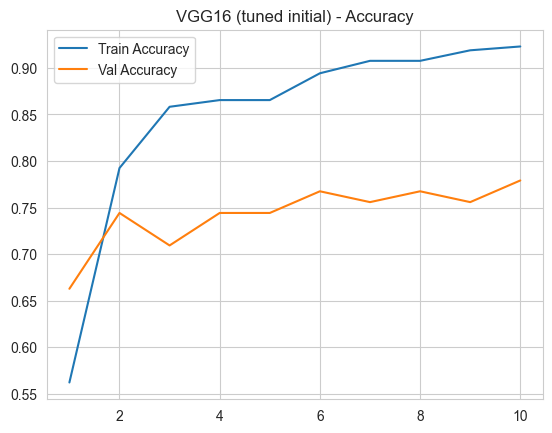

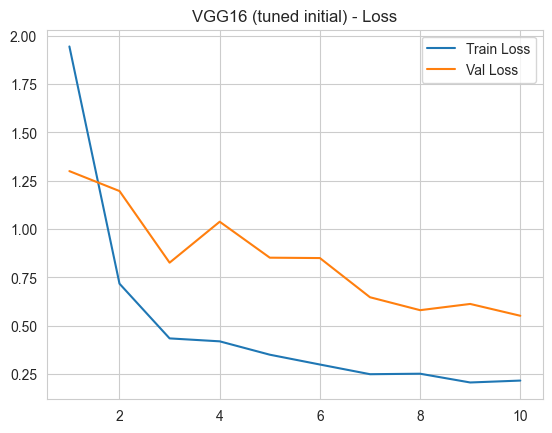

Total layers in base model: 19. Unfreezing last 30 layers.
Epoch 1/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.4774 - loss: 3.4171 

31/31 ━━━━━━━━━━━━━━━━━━━━ 362s 12s/step - accuracy: 0.4770 - loss: 3.3719 - val_accuracy: 0.4651 - val_loss: 1.2867 - learning_rate: 1.0000e-04
Epoch 2/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.5026 - loss: 1.1019 

31/31 ━━━━━━━━━━━━━━━━━━━━ 352s 11s/step - accuracy: 0.5038 - loss: 1.1002 - val_accuracy: 0.5116 - val_loss: 1.0356 - learning_rate: 1.0000e-04
Epoch 3/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.6866 - loss: 0.7974 

31/31 ━━━━━━━━━━━━━━━━━━━━ 328s 11s/step - accuracy: 0.6861 - loss: 0.7995 - val_accuracy: 0.6395 - val_loss: 0.9381 - learning_rate: 1.0000e-04
Epoch 4/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 356s 12s/step - accuracy: 0.7054 - loss: 0.8169 - val_accuracy: 0.5698 - val_loss: 0.9972 - learning_rate: 1.0000e-04
Epoch 5/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 362s 12s/step - accuracy: 0.7480 - loss: 0.6823 - val_accuracy: 0.6047 - val_loss: 0.8948 - learning_rate: 1.0000e-04


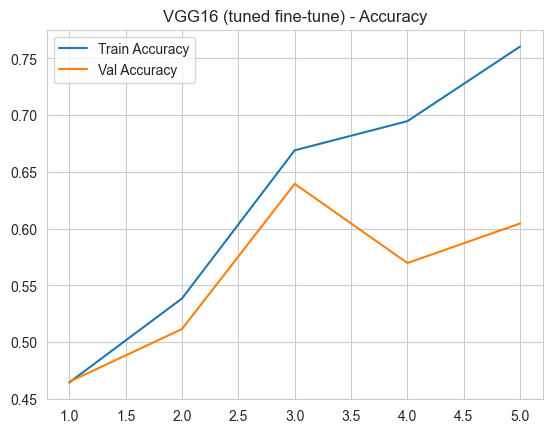

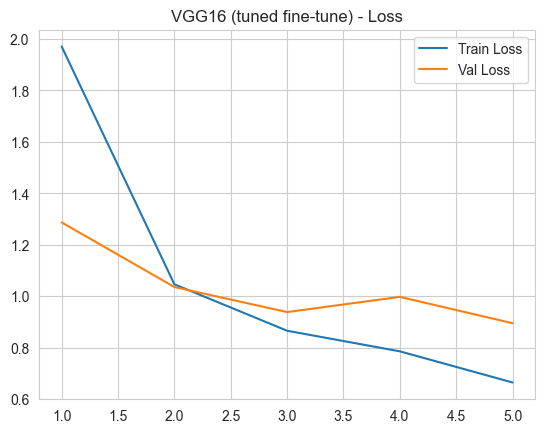

3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.6344 - loss: 0.8176
VGG16 tuned final — val_loss: 0.8948, val_acc: 0.6047
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step
Confusion matrix:
 [[19  0  0  1]
 [ 2 11  3  3]
 [ 3  0  6 19]
 [ 2  1  0 16]]
              precision    recall  f1-score   support

        acne       0.73      0.95      0.83        20
         dry       0.92      0.58      0.71        19
      normal       0.67      0.21      0.32        28
         oil       0.41      0.84      0.55        19

    accuracy                           0.60        86
   macro avg       0.68      0.65      0.60        86
weighted avg       0.68      0.60      0.58        86

=== Done with VGG16 ===


=== Hyperparameter tuning for DenseNet ===
Found 973 images belonging to 4 classes.
Found 86 images belonging to 4 classes.
Reloading Tuner from kt_tuner/DenseNet/tuner0.json
Trial 4:
  Hyperparameters: {'learning_rate': 0.004307157248235197, 'dropout_rate': 0.30000000000000004}
  Best val_accuracy

/Users/phoebe/miniforge3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3719 - loss: 1.5270

31/31 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.3770 - loss: 1.5142 - val_accuracy: 0.6744 - val_loss: 0.7416 - learning_rate: 0.0028
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8043 - loss: 0.5229

31/31 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8049 - loss: 0.5214 - val_accuracy: 0.7093 - val_loss: 0.6627 - learning_rate: 0.0028
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 979ms/step - accuracy: 0.8726 - loss: 0.3494

31/31 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8723 - loss: 0.3501 - val_accuracy: 0.7558 - val_loss: 0.5912 - learning_rate: 0.0028
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8815 - loss: 0.3499 - val_accuracy: 0.7093 - val_loss: 0.5417 - learning_rate: 0.0028
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 946ms/step - accuracy: 0.8766 - loss: 0.3314

31/31 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8770 - loss: 0.3309 - val_accuracy: 0.8023 - val_loss: 0.4703 - learning_rate: 0.0028
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8882 - loss: 0.2932 - val_accuracy: 0.7674 - val_loss: 0.4704 - learning_rate: 0.0028
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9113 - loss: 0.2535 - val_accuracy: 0.7558 - val_loss: 0.4830 - learning_rate: 0.0028
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 947ms/step - accuracy: 0.9218 - loss: 0.2352
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005660691298544407.
31/31 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9218 - loss: 0.2349 - val_accuracy: 0.7442 - val_loss: 0.4931 - learning_rate: 0.0028
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 952ms/step - accuracy: 0.9230 - loss: 0.2260

31/31 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9232 - loss: 0.2255 - val_accuracy: 0.8140 - val_loss: 0.4322 - learning_rate: 5.6607e-04
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9168 - loss: 0.2241 - val_accuracy: 0.7907 - val_loss: 0.4546 - learning_rate: 5.6607e-04


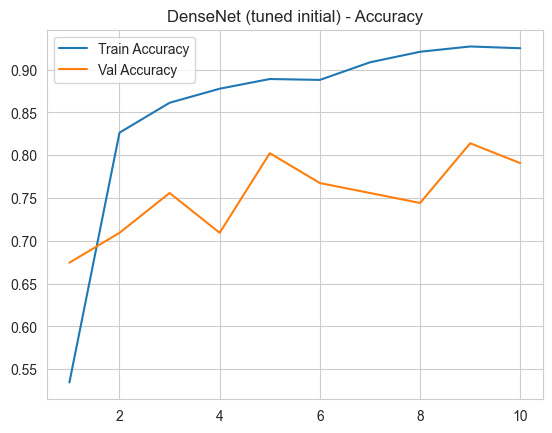

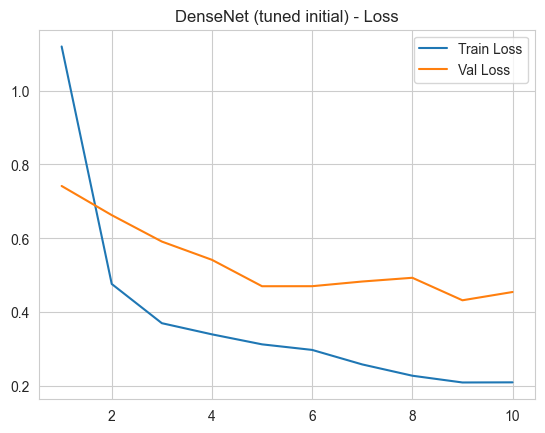

Total layers in base model: 427. Unfreezing last 30 layers.
Epoch 1/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8753 - loss: 0.2987

31/31 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8758 - loss: 0.2983 - val_accuracy: 0.8372 - val_loss: 0.4075 - learning_rate: 1.0000e-04
Epoch 2/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9144 - loss: 0.2544

31/31 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9144 - loss: 0.2537 - val_accuracy: 0.8488 - val_loss: 0.3805 - learning_rate: 1.0000e-04
Epoch 3/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9127 - loss: 0.2193 - val_accuracy: 0.8488 - val_loss: 0.3765 - learning_rate: 1.0000e-04
Epoch 4/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9371 - loss: 0.1680

31/31 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9374 - loss: 0.1679 - val_accuracy: 0.8721 - val_loss: 0.3414 - learning_rate: 1.0000e-04
Epoch 5/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9558 - loss: 0.1438

31/31 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9558 - loss: 0.1436 - val_accuracy: 0.8837 - val_loss: 0.3117 - learning_rate: 1.0000e-04


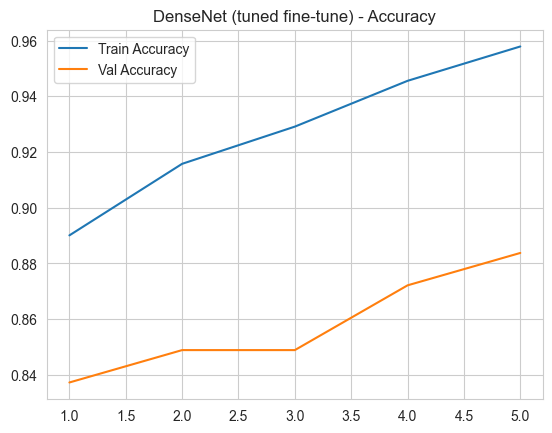

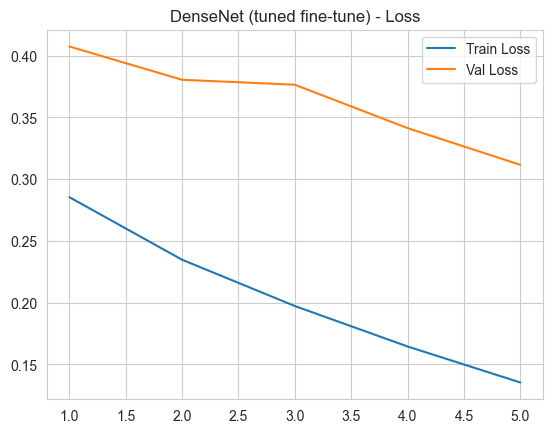

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 862ms/step - accuracy: 0.9028 - loss: 0.2638
DenseNet tuned final — val_loss: 0.3117, val_acc: 0.8837
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step  
Confusion matrix:
 [[20  0  0  0]
 [ 0 18  1  0]
 [ 1  0 21  6]
 [ 1  1  0 17]]
              precision    recall  f1-score   support

        acne       0.91      1.00      0.95        20
         dry       0.95      0.95      0.95        19
      normal       0.95      0.75      0.84        28
         oil       0.74      0.89      0.81        19

    accuracy                           0.88        86
   macro avg       0.89      0.90      0.89        86
weighted avg       0.89      0.88      0.88        86

=== Done with DenseNet ===



In [23]:
# 7. MAIN EXECUTION: TRAIN ALL FOUR MODELS

if __name__ == "__main__":
    model_names = ["MobileNetV2", "InceptionV3", "EfficientNet", "VGG16", "DenseNet"]

    for m_name in model_names:
        print(f"\n=== Hyperparameter tuning for {m_name} ===")
        preprocess_func = get_preprocessing_func(m_name)
        train_gen, val_gen = create_data_generators(DATA_DIR, IMG_SIZE, BATCH_SIZE, preprocess_func)

        tuner = kt.RandomSearch(
            hypermodel=lambda hp: tuner_model_builder(hp, m_name),
            objective="val_accuracy",
            max_trials=5,
            executions_per_trial=1,
            directory="kt_tuner",
            project_name=m_name
        )
        tuner.search(
            train_gen,
            validation_data=val_gen,
            epochs=INITIAL_EPOCHS,
            callbacks=[EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)]
        )

        for trial_id, trial in tuner.oracle.trials.items():
            hp_vals = trial.hyperparameters.values
            score  = trial.score  # best objective score (val_accuracy) for this trial
            print(f"Trial {trial_id}:")
            print("  Hyperparameters:", hp_vals)
            print(f"  Best val_accuracy: {score:.4f}")
            print()

        best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
        print(f"Best lr: {best_hps.get('learning_rate'):.4e}, best dropout: {best_hps.get('dropout_rate')}")

        # Build and train best model
        model = tuner.hypermodel.build(best_hps)
        hist_initial = train_model(model, train_gen, val_gen, INITIAL_EPOCHS, m_name + "_tuned")
        plot_training_curves(hist_initial, model_name=m_name + " (tuned initial)")

        # Fine-tune and plot
        hist_ft = fine_tune_model(model, train_gen, val_gen, fine_tune_layers=30, epochs=FINE_TUNE_EPOCHS, model_name=m_name + "_tuned")
        plot_training_curves(hist_ft, model_name=m_name + " (tuned fine-tune)")

        # Evaluate & metrics
        loss, acc = model.evaluate(val_gen)
        print(f"{m_name} tuned final — val_loss: {loss:.4f}, val_acc: {acc:.4f}")

        y_pred = model.predict(val_gen)
        y_pred_cls = np.argmax(y_pred, axis=1)
        y_true = val_gen.classes

        print("Confusion matrix:\n", confusion_matrix(y_true, y_pred_cls))
        class_labels = list(val_gen.class_indices.keys())
        print(classification_report(y_true, y_pred_cls, target_names=class_labels))

        print(f"=== Done with {m_name} ===\n")